In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas_profiling.visualisation import missing as pdp_missing
import plotly
import plotly.express as px
import plotly.graph_objects as go
from IPython.core.display import display, HTML

In [3]:
df = pd.read_csv('..//data//train.csv', header=0)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Titanic Survival Dataset
## Exploratory Data Analysis
By: Michael Kam

# Overview

In [24]:
color_map = { '0': 'Coral', '1': 'DarkSeaGreen'}

fig = px.bar(x = df.Survived.value_counts().keys().astype(str), y = df.Survived.value_counts(), 
       color = np.unique(df.Survived.astype(str)), labels = {'x':'Survived', 'y':'Total Passengers'}, 
       title='Titanic Survival', text = np.round(df.Survived.value_counts(normalize=True) * 100, 1).astype(str) + '%',
       color_discrete_map = color_map
            )

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1],
        ticktext = ['no', 'yes']
        ),
    font_family = "Arial",
    showlegend=False,
    autosize=False,
    margin=dict(l=20, r=20, t=80, b=80),
    template="simple_white",
    height=300, width=400
)

Check the subslide down below by pressing the down arrow on the keyboard or the navigation panel.

# Missing Values

In [87]:
display(HTML(pdp_missing.missing_bar(df)))

# Relationship between Ticket Class, Sex, Port Embarked, and Survival

In [61]:
                                
pclass_dim = go.parcats.Dimension(values = df.Pclass, label = "Ticket Class")

sex_dim = go.parcats.Dimension(values = df.Sex, label="Sex")

embarked_dim = go.parcats.Dimension(values = df.Embarked, label="Port Embarked",
                                   categoryarray = ['C', 'Q', 'S'], ticktext=['Cherbourg','Queenstown', 'Southampton'])

survived_dim = go.parcats.Dimension(values = df.Survived, label ='Survived',
                                   categoryarray = [0, 1], ticktext = ['no', 'yes'])

color = df.Survived
colorscale = [[0, 'Coral'], [1, 'DarkSeaGreen']]

fig = go.Figure(
    data = [go.Parcats(dimensions = [pclass_dim, sex_dim, embarked_dim, survived_dim],
            line = {'color': color, 'colorscale': colorscale},
            hoveron='color', hoverinfo='count+probability'
            )])


fig.update_layout(
    autosize=False,
    margin=dict(l=20, r=20, t=80, b=80),
    width=750, height=500, template="simple_white"
)

# Ticket Fare Distribution based on Ticket Class, Sex, and Survival

In [69]:
fig = px.box(data_frame=df, x='Survived', y='Fare', color='Pclass',
            category_orders={'Pclass': [1, 2, 3]},
            color_discrete_map = {1: 'LightGreen', 2: 'LightSalmon' , 3: 'LightSlateGray'})


fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1],
        ticktext = ['no', 'yes']
        ),
    autosize=False,
    margin=dict(l=20, r=20, t=80, b=80),
    width=750, height=500, template="simple_white"
)

# Correlation of Numerical Variables

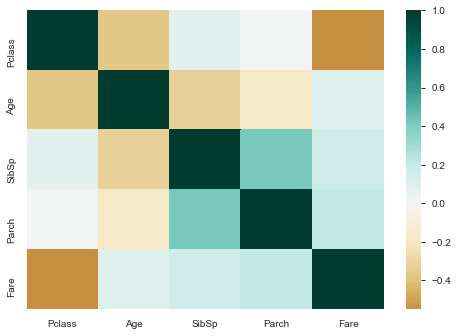

In [6]:
fig = sns.heatmap(df[['Pclass','Age', 'SibSp', 'Parch', 'Fare']].corr(), cmap="BrBG", center=0)

Take note that `Pclass` is an ordinal variable instead of numerical.

# Logistic Regression
Based on Wikipedia, logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. 

Logistic regression model is commonly used for classification problem in machine learning. 
Press the arrow down to see the formula.


The following is the formula of the logistic regression:

$$\textit{l} = \log\frac{p}{1-p} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_m x_m$$

where $\textit{l}$  is the log odds model and $\beta_i$ is the parameter or the coefficient of independent variable $x_i$.

# Next Steps
* Impute or drop missing values if necessary
* Build a baseline model with Logistic Regression
* Use p-value forward selection to build the final model
* Evaluate the confusion matrix
* Compare with XGBoost model